# Exploratory Data Analysis (EDA) - Citi Bike Trips

In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.float_format', '{:,.2f}'.format)

## 1. Merge The Sources

In [3]:
path1 = os.path.abspath('../data/saved_data/clean_citibike_trips.parquet')
path2 = os.path.abspath('../data/saved_data/clean_citibike_stations.parquet')

In [4]:
df1 = pd.read_parquet(path1)
df2 = pd.read_parquet(path2)

In [5]:
df1 = df1[2024 < df1['started_at'].dt.year]

In [6]:
first_merge = df1.merge(
    right=df2[['borough', 'postcode']].add_prefix('start_'),
    how='left',
    left_on='start_station_id',
    right_index=True
)

df3 = first_merge.merge(
    right=df2[['borough', 'postcode']].add_prefix('end_'),
    how='left',
    left_on='end_station_id',
    right_index=True
)

In [7]:
if df3.shape[0] == df1.shape[0]:
    print('Dataframes successfully merged!')

Dataframes successfully merged!


In [8]:
df3.head()

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration,trip_distance,start_borough,start_postcode,end_borough,end_postcode
ride_id,,,,,,,,,,,,,,,,,,
56BD148A05E26915,Electric,2025-01-01 22:19:06.324,2025-01-01 22:23:32.899,W 36 St & 7 Ave,"6,483.06",W 24 St & 7 Ave,"6,257.03",40.75,-73.99,40.74,-74.00,Member,266,0.59,Manhattan,10018,Manhattan,10011
700CCCDF00C08077,Electric,2025-01-09 15:20:43.991,2025-01-09 15:26:19.137,Broadway & E 19 St,"5,980.11",W 24 St & 7 Ave,"6,257.03",40.74,-73.99,40.74,-74.00,Member,335,0.53,Manhattan,10003,Manhattan,10011
B1A3FAFA5FE651CE,Electric,2025-01-01 12:54:26.571,2025-01-01 13:03:03.565,Jackson Ave & 46 Rd,"6,203.02",Crescent St & Broadway,"6,827.11",40.75,-73.95,40.76,-73.93,Member,516,1.59,Queens,11101,Queens,11106
9CB0F28054BA5EBC,Electric,2025-01-14 13:43:59.151,2025-01-14 13:49:04.543,Broadway & E 19 St,"5,980.11",W 24 St & 7 Ave,"6,257.03",40.74,-73.99,40.74,-74.00,Member,305,0.53,Manhattan,10003,Manhattan,10011
A1B8FDD4FAF0C2B2,Electric,2025-01-13 07:20:37.176,2025-01-13 07:29:18.015,Willis Ave & E 143 St,"7,798.02",1 Ave & E 110 St,"7,522.02",40.81,-73.92,40.79,-73.94,Member,520,1.67,The Bronx,10454,Manhattan,10029


## 2. Analyze Trip Data

### 2a. Display statistics on the time and distance traveled by each borough.

- **Manhattan** and **Brooklyn** have the most frequent trips with the highest average trip time/distance
- Bike trips average around **11 minutes** and **1 mile**
- The dispersion of trip time/distance is **moderately close** based on the standard deviation

In [9]:
df3.groupby(
    'start_borough'
)[
    [
        'trip_duration',
        'trip_distance'
    ]
].agg(
    ['mean', 'median', 'std', 'min', 'max', 'count']
)

trip_duration                                  trip_distance  \
                       mean median    std min   max    count          mean   
start_borough                                                                
Brooklyn             677.84 500.00 582.79  60  7197  4125080          1.25   
Manhattan            673.55 494.00 614.44  52  7200  9715383          1.19   
Queens               619.52 419.00 593.40  60  7199  1035477          1.15   
The Bronx            639.41 438.00 666.90  60  7200   431619          1.11   

                                               
              median  std  min   max    count  
start_borough                                  
Brooklyn        0.93 1.04 0.00 14.89  4125080  
Manhattan       0.90 1.00 0.00 14.89  9715383  
Queens          0.76 1.10 0.00 11.90  1035477  
The Bronx       0.79 1.13 0.00 17.60   431619

### 2b. Create a histogram for the duration/time of trips by bike type.

- Both distributions are **right-skewed**
- Shaped like an **exponential** distribution
- Riders are more often riding electric bikes

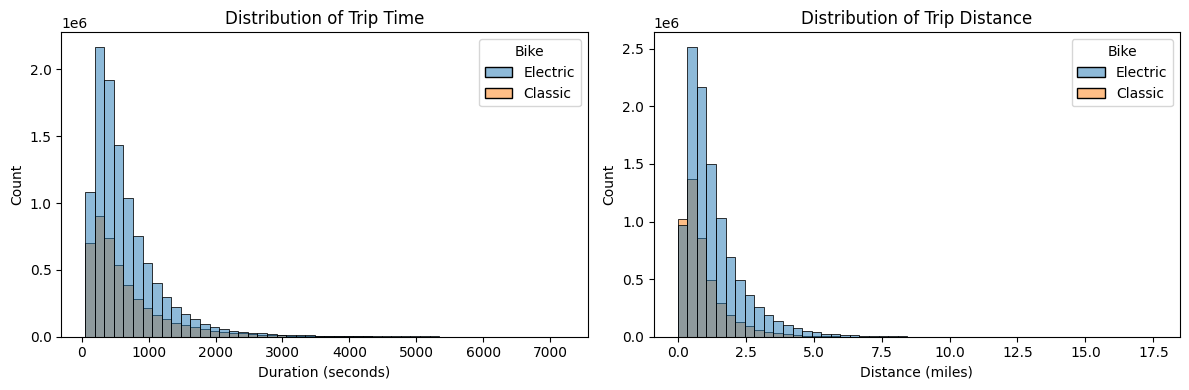

In [10]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 4))

sns.histplot(
    data=df3,
    x='trip_duration',
    hue='rideable_type',
    bins=50,
    ax=axs[0],
)
axs[0].set_title('Distribution of Trip Time')
axs[0].set_xlabel('Duration (seconds)')
axs[0].get_legend().set_title('Bike')

sns.histplot(
    data=df3,
    x='trip_distance',
    hue='rideable_type',
    bins=50,
    ax=axs[1]
)

axs[1].set_title('Distribution of Trip Distance')
axs[1].set_xlabel('Distance (miles)')
axs[1].get_legend().set_title('Bike')

plt.tight_layout()
plt.show()

### 2c. Create a matrix for total riders by month and weekday

- **January** and **February** were the lowest performing months
- Bike riding picks up after **March**

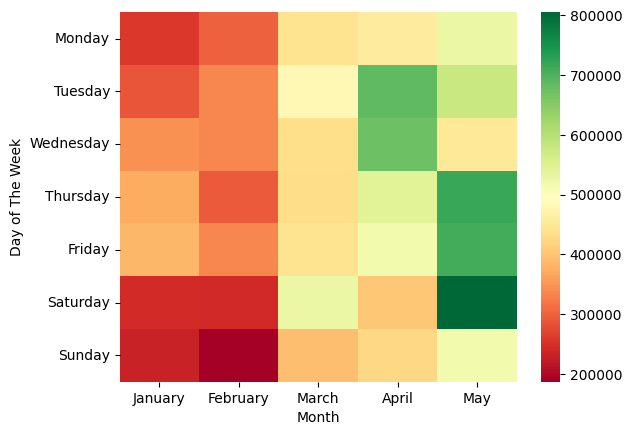

In [11]:
df3['day_name'] = df3['started_at'].dt.day_name()
df3['month'] = df3['started_at'].dt.month_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

matrix_1 = df3.pivot_table(
    index='day_name',
    columns='month',
    aggfunc='size',
    fill_value=0
    )[
        ['January', 'February', 'March', 'April', 'May']
    ]

matrix_1 = matrix_1.reindex(day_order)

sns.heatmap(
    matrix_1,
    cmap='RdYlGn'
)

plt.xlabel('Month')
plt.ylabel('Day of The Week')
plt.show()

### 2d. Create a matrix for total riders by hour and weekdays

- There are two peaks for the total number of riders on weekdays (Monday-Friday), **6-9am**, and **5-7pm**
- During rush hours, the bikes are being used to travel to work or home

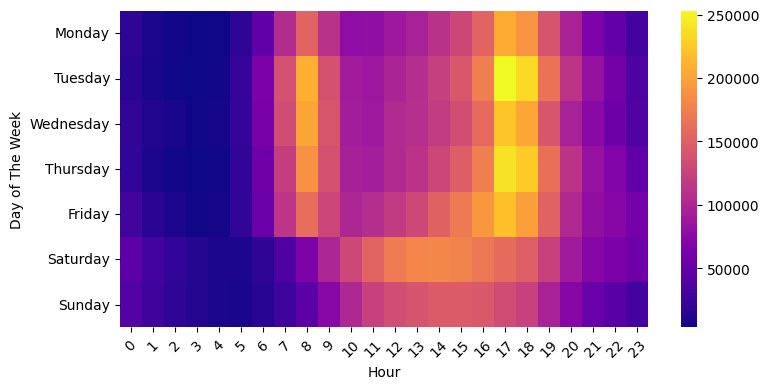

In [12]:
df3['start_hour'] = df3['started_at'].dt.hour 

matrix_2 = df3.pivot_table(index='day_name', columns='start_hour', aggfunc='size', fill_value=0)
matrix_2 = matrix_2.reindex(day_order)

plt.figure(figsize=(8, 4))

sns.heatmap(
    matrix_2,
    cmap='plasma'
)

plt.xlabel('Hour')
plt.ylabel('Day of The Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 2e. Popular starting bike stations by borough

- The starting locations are at hot spots with **restaurants**, **stadiums**, **museums**, **parks**, **bridges**, **piers**, and more

In [13]:
df3.groupby(
    [
        'start_borough',
    ]
)['start_station_name'].apply(
    lambda group:
    group.value_counts().head()
).rename_axis(
    index={
        'start_borough': 'Borough'
    }
    ).to_frame(name='Popular Stations')

Popular Stations
Borough                                                     
Brooklyn  N 7 St & Driggs Ave                          33611
          N 6 St & Bedford Ave                         30181
          Hanson Pl & Ashland Pl                       28637
          Metropolitan Ave & Bedford Ave               28357
          S 2 St & Kent Ave                            28000
Manhattan W 21 St & 6 Ave                              58153
          Pier 61 at Chelsea Piers                     53300
          Lafayette St & E 8 St                        49321
          W 31 St & 7 Ave                              48123
          9 Ave & W 33 St                              45498
Queens    Queens Plaza North & Crescent St             16710
          Vernon Blvd & 50 Ave                         16213
          31 St & Broadway                             14924
          46 Ave & 5 St                                14896
          Jackson Ave & 49 Ave                         14843
The Bronx E 161 St & River Ave                          6697
          Melrose Ave & E 150 St                        6396
          Grand Concourse & E 161 St                    4424
          Lincoln Ave & E 138 St                        3982
          Grand Concourse & E 144 St                    3900

### 2f. Popular end stations by borough

- Similar to the popular start stations, most riders start and end trips at these hot spots

In [14]:
df3.groupby(
    ['start_borough']
)['end_station_name'].apply(
    lambda group:
    group.value_counts().head()
).rename_axis(
    index={
        'start_borough': 'Borough'
    }
).to_frame('Popular End Stations')

Popular End Stations
Borough                                                        
Brooklyn  N 7 St & Driggs Ave                             30533
          Hanson Pl & Ashland Pl                          27481
          N 6 St & Bedford Ave                            26834
          Metropolitan Ave & Bedford Ave                  23893
          S 2 St & Kent Ave                               23634
Manhattan W 21 St & 6 Ave                                 56836
          Pier 61 at Chelsea Piers                        52195
          W 31 St & 7 Ave                                 47203
          Lafayette St & E 8 St                           47033
          9 Ave & W 33 St                                 44985
Queens    31 St & Broadway                                13496
          31 St & Newtown Ave                             11941
          46 Ave & 5 St                                   11789
          Steinway St & Broadway                          11431
          31 St & Ditmars Blvd                            11033
The Bronx Melrose Ave & E 150 St                           5989
          E 161 St & River Ave                             5392
          Plaza Dr & W 170 St                              3403
          Westchester Ave & Southern Blvd                  3382
          Morris Ave & E 163 St                            3368

### 2g. Top 10 zip codes with the most Citi Bike stations near the area

- **Long Island City** has multiple Citi bike stations, this area allows riders to access the 5 boroughs easily

In [15]:
df3.groupby(
    'start_postcode'
)['start_station_id'].agg(
    'nunique'
).sort_values(ascending=False).rename_axis(
    index={
        'start_postcode': 'Zip Code'
    }
).head(10).to_frame(
    'Number of Stations'
)

,Number of Stations
Zip Code,
11101,73
11233,52
11377,47
11368,44
11385,39
11373,39
11215,38
11231,37
11221,37


## 3. Analyze Citi Bike Users

### 3a. Create a box plot with the relationship of trip duration by boroughs and users

- **Casual** users on average spend more time on bikes than users with a membership 

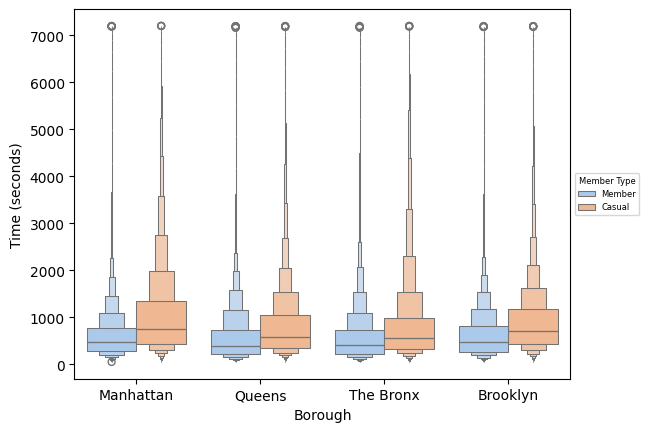

In [16]:
sns.boxenplot(
    data=df3,
    x='start_borough',
    y='trip_duration',
    hue='member_casual',
    palette='pastel'
    )

plt_legend = plt.legend(fontsize=6, loc='center left', bbox_to_anchor=(1, 0.5))
plt_legend.set_title('Member Type', prop={'size': 6})
plt.xlabel('Borough')
plt.ylabel('Time (seconds)')
plt.show()

### 3b. What are the most popular start and end stations by boroughs and users?

- **Casual** users typically return the bike at the same station
- **Member** users are most likely local residents

In [17]:
df3.groupby(
    ['start_borough', 'member_casual']
)[['start_station_name', 'end_station_name']].apply(
    lambda group:
    group.value_counts().head(5)
).rename_axis(
    index={
        'member_casual': 'User',
        'start_borough': 'Borough',
        'start_station_name': 'Starting Station',
        'end_station_name': 'Ending Station'
    }
).to_frame('Count')

Count
Borough   User   Starting Station                  Ending Station                          
Brooklyn  Casual West Drive & Prospect Park West   West Drive & Prospect Park West      584
                 Parkside Ave & Ocean Ave          Parkside Ave & Ocean Ave             524
                 Brooklyn Bridge Park - Pier 2     Brooklyn Bridge Park - Pier 2        506
                 Park Circle & East Dr             Park Circle & East Dr                424
                 Plaza St East & Flatbush Ave      Plaza St East & Flatbush Ave         399
          Member Franklin St & Dupont St           Jackson Ave & 49 Ave                2251
                 N 6 St & Bedford Ave              S 4 St & Wythe Ave                  1767
                                                   S 2 St & Kent Ave                   1712
                 Richardson St & N Henry St        Graham Ave & Conselyea St           1657
                 S 3 St & Bedford Ave              N 6 St & Bedford Ave                1570
Manhattan Casual Central Park S & 6 Ave            Central Park S & 6 Ave              4076
                 7 Ave & Central Park South        7 Ave & Central Park South          3637
                 Roosevelt Island Tramway          Roosevelt Island Tramway            2147
                 Central Park S & Grand Army Plaza Central Park S & Grand Army Plaza   1906
                 Central Park W & W 72 St          Central Park W & W 72 St            1253
          Member Norfolk St & Broome St            Henry St & Grand St                 2562
                 Henry St & Grand St               Norfolk St & Broome St              2273
                 W 21 St & 6 Ave                   9 Ave & W 22 St                     2199
                 E 77 St & 1 Ave                   2 Ave & E 72 St                     2148
                 North Moore St & Greenwich St     Vesey St & Greenwich St             2113
Queens    Casual Jackson Ave & 49 Ave              Franklin St & Dupont St              347
                 Center Blvd & 51 Ave              Center Blvd & 51 Ave                 201
                 Jackson Ave & 49 Ave              Ash St & Manhattan Ave               190
                 55 Ave & Center Blvd              Vernon Blvd & 50 Ave                 172
                 Jackson Ave & 49 Ave              McGuinness Blvd & Eagle St           152
          Member 55 Ave & Center Blvd              Vernon Blvd & 50 Ave                2239
                 Vernon Blvd & 50 Ave              55 Ave & Center Blvd                2082
                 Jackson Ave & 49 Ave              Franklin St & Dupont St             1994
                 46 Ave & 5 St                     45 Ave & 21 St                      1514
                 45 Ave & 21 St                    46 Ave & 5 St                       1409
The Bronx Casual Broadway & Van Cortlandt Park S   Broadway & Van Cortlandt Park S      181
                 E 161 St & River Ave              E 161 St & River Ave                 125
                 Crescent Ave & Belmont Ave        E 188 St & Creston Ave               101
                 Ogden Ave & W 165 St              E 161 St & River Ave                  74
                 Concourse Village East & E 158 St River Ave & E 151 St                  68
          Member E 161 St & River Ave              E 161 St & River Ave                 393
                 Paul Ave & W 205 St               Jerome Ave & Bedford Park Blvd E     356
                 Goulden Ave & W 205 St            Jerome Ave & Bedford Park Blvd E     311
                 Jerome Ave & Bedford Park Blvd E  Paul Ave & W 205 St                  287
                 Sedgwick Ave & Hillman Ave        Jerome Ave & E Mosholu Pkwy S        266